**importing the Depedencies**

In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
import subprocess
# Execute pip install command
subprocess.check_call(['pip', 'install', 'fsspec'])

0

data collection & pre-processing

In [ ]:
raw_mail_data = pd.read_csv("D://spam_ham_dataset.csv")

In [ ]:
print(raw_mail_data)

      Unnamed: 0 label                                               text  \
0            605   ham  Subject: enron methanol ; meter # : 988291\r\n...   
1           2349   ham  Subject: hpl nom for january 9 , 2001\r\n( see...   
2           3624   ham  Subject: neon retreat\r\nho ho ho , we ' re ar...   
3           4685  spam  Subject: photoshop , windows , office . cheap ...   
4           2030   ham  Subject: re : indian springs\r\nthis deal is t...   
...          ...   ...                                                ...   
5166        1518   ham  Subject: put the 10 on the ft\r\nthe transport...   
5167         404   ham  Subject: 3 / 4 / 2000 and following noms\r\nhp...   
5168        2933   ham  Subject: calpine daily gas nomination\r\n>\r\n...   
5169        1409   ham  Subject: industrial worksheets for august 2000...   
5170        4807  spam  Subject: important online banking alert\r\ndea...   

      label_num  
0             0  
1             0  
2             0  
3  

In [ ]:
#replace the null value with a null string
mail_data = raw_mail_data.where((pd.notnull(raw_mail_data)),'')

In [ ]:
#printing the first 5 rows of the dataframe
mail_data.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [ ]:
#checking the number of rows and columns in the dataframe
mail_data.shape

(5171, 4)

**Label Encoding**

In [ ]:
#label spam mail as 1;
#ham mail as 0;
mail_data.loc[mail_data['label']=='spam','label',] = 0
mail_data.loc[mail_data['label']=='ham','label',] = 1

spam = 0
ham = 1

In [ ]:
#seprating the data as texts and label
x=mail_data['text']
y=mail_data['label']

In [ ]:
print(x)

0       Subject: enron methanol ; meter # : 988291\r\n...
1       Subject: hpl nom for january 9 , 2001\r\n( see...
2       Subject: neon retreat\r\nho ho ho , we ' re ar...
3       Subject: photoshop , windows , office . cheap ...
4       Subject: re : indian springs\r\nthis deal is t...
                              ...                        
5166    Subject: put the 10 on the ft\r\nthe transport...
5167    Subject: 3 / 4 / 2000 and following noms\r\nhp...
5168    Subject: calpine daily gas nomination\r\n>\r\n...
5169    Subject: industrial worksheets for august 2000...
5170    Subject: important online banking alert\r\ndea...
Name: text, Length: 5171, dtype: object


In [ ]:
print(y)

0       1
1       1
2       1
3       0
4       1
       ..
5166    1
5167    1
5168    1
5169    1
5170    0
Name: label, Length: 5171, dtype: object


**EDA**

In [ ]:
mail_data.head()

,Unnamed: 0,label,text,label_num
0,605,1,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,1,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,0,"Subject: photoshop , windows , office . cheap ...",1
4,2030,1,Subject: re : indian springs\r\nthis deal is t...,0


In [ ]:
mail_data['label'].value_counts()

label
1    3672
0    1499
Name: count, dtype: int64

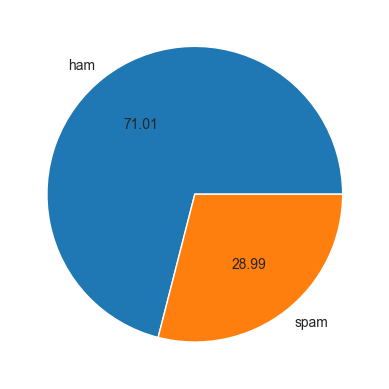

In [ ]:
import matplotlib.pyplot as plt
plt.pie(mail_data['label'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [ ]:
import nltk
nltk.data.path.append("C:/Users/niraj/nltk_data")

In [ ]:
!pip install nltk

In [ ]:
mail_data['num_characters'] = mail_data['text'].apply(len)

In [ ]:
mail_data.head()

,Unnamed: 0,label,text,label_num,num_characters
0,605,1,Subject: enron methanol ; meter # : 988291\r\n...,0,327
1,2349,1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97
2,3624,1,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524
3,4685,0,"Subject: photoshop , windows , office . cheap ...",1,414
4,2030,1,Subject: re : indian springs\r\nthis deal is t...,0,336


In [ ]:
mail_data['num_words'] = mail_data['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
mail_data.head()

,Unnamed: 0,label,text,label_num,num_characters,num_words
0,605,1,Subject: enron methanol ; meter # : 988291\r\n...,0,327,68
1,2349,1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,24
2,3624,1,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,551
3,4685,0,"Subject: photoshop , windows , office . cheap ...",1,414,49
4,2030,1,Subject: re : indian springs\r\nthis deal is t...,0,336,71


In [ ]:
mail_data['num_sentences'] = mail_data['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
mail_data.head()

,Unnamed: 0,label,text,label_num,num_characters,num_words,num_sentences
0,605,1,Subject: enron methanol ; meter # : 988291\r\n...,0,327,68,3
1,2349,1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,24,3
2,3624,1,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,551,24
3,4685,0,"Subject: photoshop , windows , office . cheap ...",1,414,49,3
4,2030,1,Subject: re : indian springs\r\nthis deal is t...,0,336,71,3


In [ ]:
mail_data[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5171.000000,5171.000000,5171.000000
mean,1048.391994,229.181009,13.121253
std,1528.513435,336.487397,27.541637
min,11.000000,2.000000,1.000000
25%,244.000000,52.000000,4.000000
50%,540.000000,122.000000,7.000000
75%,1237.000000,283.500000,15.000000
max,32258.000000,8863.000000,1204.000000


In [ ]:
# ham
mail_data[mail_data['label'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,3672.000000,3672.000000,3672.000000
mean,977.008170,226.239107,11.440904
std,1382.827493,332.179661,24.892442
min,18.000000,3.000000,1.000000
25%,231.750000,51.000000,3.000000
50%,530.000000,124.000000,6.000000
75%,1227.250000,294.000000,13.000000
max,32258.000000,8863.000000,1204.000000


In [ ]:
#spam
mail_data[mail_data['label'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,1499.000000,1499.000000,1499.000000
mean,1223.256171,236.387592,17.237492
std,1825.986210,346.821249,32.796043
min,11.000000,2.000000,1.000000
25%,283.000000,55.000000,4.000000
50%,576.000000,116.000000,9.000000
75%,1253.500000,244.000000,18.500000
max,22073.000000,3963.000000,693.000000


In [ ]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

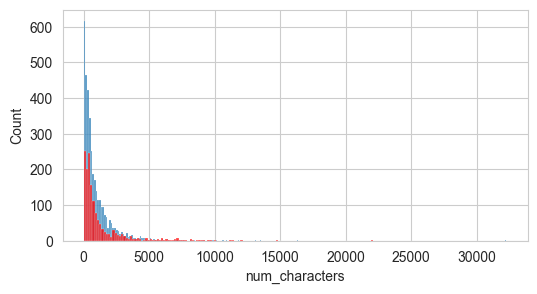

In [ ]:
plt.figure(figsize=(6,3))
sns.histplot(mail_data[mail_data['label'] == 1]['num_characters'],)
sns.histplot(mail_data[mail_data['label'] == 0]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

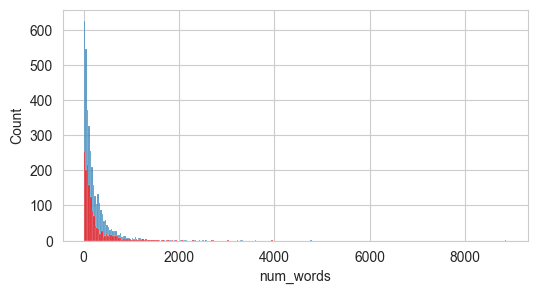

In [ ]:
plt.figure(figsize=(6,3))
sns.histplot(mail_data[mail_data['label'] == 1]['num_words'])
sns.histplot(mail_data[mail_data['label'] == 0]['num_words'],color='red')

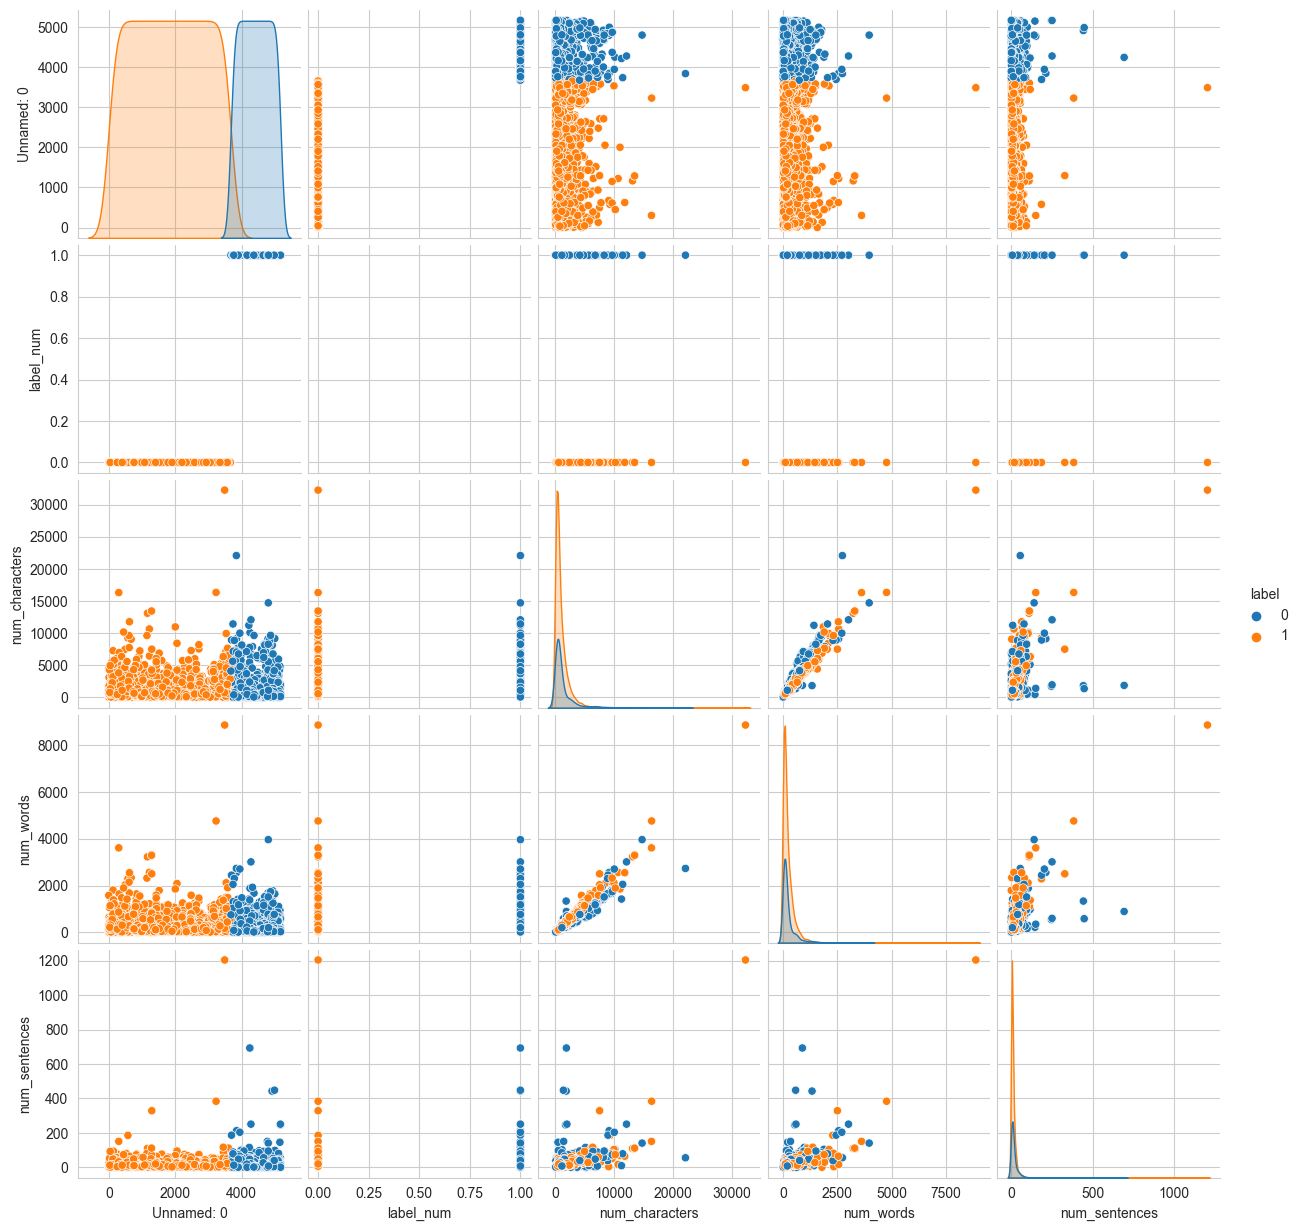

In [ ]:
sns.pairplot(mail_data,hue='label')

<Axes: >

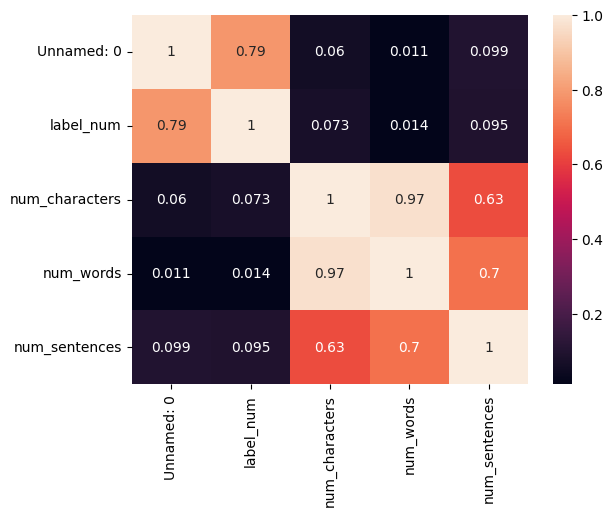

In [ ]:
import seaborn as sns
import pandas as pd

# Select only numeric columns
numeric_data = mail_data.select_dtypes(include='number')

# Create correlation matrix and heatmap
sns.heatmap(numeric_data.corr(), annot=True)


**3. Data Preprocessing**
   Lower case
   Tokenization
   Removing special characters
   Removing stop words and punctuation
   Stemming


In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
import string
from nltk.corpus import stopwords

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [ ]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [ ]:
mail_data['transformed_text'] = mail_data['text'].apply(transform_text)

In [ ]:
mail_data.head()

,Unnamed: 0,label,text,label_num,num_characters,num_words,num_sentences,transformed_text
0,605,1,Subject: enron methanol ; meter # : 988291\r\n...,0,327,68,3,subject enron methanol meter 988291 follow not...
1,2349,1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,24,3,subject hpl nom januari 9 2001 see attach file...
2,3624,1,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,551,24,subject neon retreat ho ho ho around wonder ti...
3,4685,0,"Subject: photoshop , windows , office . cheap ...",1,414,49,3,subject photoshop window offic cheap main tren...
4,2030,1,Subject: re : indian springs\r\nthis deal is t...,0,336,71,3,subject indian spring deal book teco pvr reven...


In [ ]:
spam_corpus = []
for msg in mail_data[mail_data['label'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [ ]:
len(spam_corpus)

197452

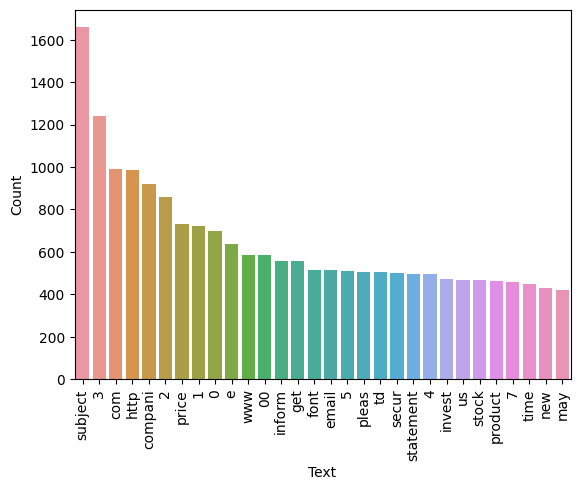

In [ ]:
from collections import Counter

spam_counter = Counter(spam_corpus)
top_30_common = spam_counter.most_common(30)
data_frame = pd.DataFrame(top_30_common, columns=['Text', 'Count'])

sns.barplot(x='Text', y='Count', data=data_frame)
plt.xticks(rotation='vertical')
plt.show()


In [ ]:
ham_corpus = []
for msg in mail_data[mail_data['label'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [ ]:
len(ham_corpus)

388650

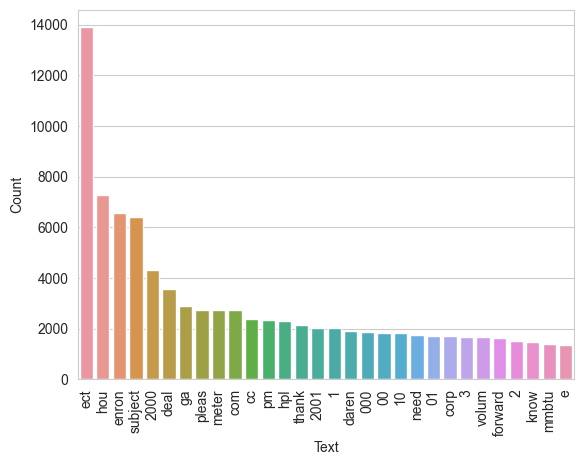

In [ ]:
from collections import Counter
ham_counter = Counter(ham_corpus)
top_30_common = ham_counter.most_common(30)
data_frame = pd.DataFrame(top_30_common, columns=['Text', 'Count'])
sns.barplot(x='Text', y='Count', data=data_frame)
plt.xticks(rotation='vertical')
plt.show()


In [ ]:
# Text Vectorization
# using Bag of Words
mail_data.head()

,Unnamed: 0,label,text,label_num,num_characters,num_words,num_sentences,transformed_text
0,605,1,Subject: enron methanol ; meter # : 988291\r\n...,0,327,68,3,subject enron methanol meter 988291 follow not...
1,2349,1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,24,3,subject hpl nom januari 9 2001 see attach file...
2,3624,1,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,551,24,subject neon retreat ho ho ho around wonder ti...
3,4685,0,"Subject: photoshop , windows , office . cheap ...",1,414,49,3,subject photoshop window offic cheap main tren...
4,2030,1,Subject: re : indian springs\r\nthis deal is t...,0,336,71,3,subject indian spring deal book teco pvr reven...


**model building**

In [ ]:
cv= CountVectorizer()

In [ ]:
X=mail_data['text']
Y=mail_data['label']


In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=3)

In [ ]:
print(X.shape)
print(X_test.shape)
print(X_train.shape)


(5171,)
(1035,)
(4136,)


**feature extraction**

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of TfidfVectorizer
tfidf = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)

# Fit the vectorizer on the preprocessed training data
X_train_features = tfidf.fit_transform(X_train)

# Transform the preprocessed test data using the same vectorizer
X_test_features = tfidf.transform(X_test)

# Convert the target labels to integers using label encoding
label_encoder = LabelEncoder()
Y_train = label_encoder.fit_transform(Y_train)
Y_test = label_encoder.transform(Y_test)

In [ ]:
print(X_train)

2209    Subject: hplc to wellhead\r\ndaren here is the...
2000    Subject: mobil chemical - hpl meter # 1256 - e...
5030    Subject: revised nom 5 / 5 - eastrans ; revise...
1376    Subject: re : exxon company , usa global # 960...
1564    Subject: your pharmacy nx\r\nwant a cheap pain...
                              ...                        
789     Subject: incr ' ease yo ' ur man ' hood by 4 -...
968     Subject: subscribers receive first notice on r...
1667    Subject: neon for march 28\r\nhere is the neon...
3321    Subject: re : first delivery - pure resources ...
1688    Subject: enhance your chest size\r\nemail is l...
Name: text, Length: 4136, dtype: object


In [ ]:
print(X_train_features)

  (0, 3871)	0.13387711316973605
  (0, 531)	0.14556222812251965
  (0, 30451)	0.08468916670398006
  (0, 43273)	0.14556222812251965
  (0, 3890)	0.14556222812251965
  (0, 548)	0.14556222812251965
  (0, 37262)	0.11275796314501375
  (0, 2908)	0.11535664415295803
  (0, 456)	0.14556222812251965
  (0, 26297)	0.09506000151609588
  (0, 36190)	0.11400727959297849
  (0, 2478)	0.13872687405852518
  (0, 521)	0.14556222812251965
  (0, 16808)	0.11843023142166303
  (0, 22041)	0.13387711316973605
  (0, 2706)	0.14556222812251965
  (0, 522)	0.14556222812251965
  (0, 32060)	0.07311834410351342
  (0, 19411)	0.04211028825505044
  (0, 2537)	0.13872687405852518
  (0, 517)	0.14556222812251965
  (0, 19429)	0.14556222812251965
  (0, 16637)	0.24438399643390496
  (0, 3875)	0.14556222812251965
  (0, 836)	0.14556222812251965
  :	:
  (4135, 8873)	0.07154271542163933
  (4135, 16161)	0.07327358549803296
  (4135, 26936)	0.07154271542163933
  (4135, 15691)	0.07812310961344454
  (4135, 14167)	0.07812310961344454
  (4135, 11

In [ ]:
print(Y_train)

[1 1 1 ... 1 1 0]


In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train_features,Y_train)

LogisticRegression()

**Evaluating the trained model**

In [ ]:
#prediction on training data
prediction_on_training_data=model.predict(X_train_features)
accuracy_on_training_data=accuracy_score(Y_train,prediction_on_training_data)

In [ ]:
print('Accuracy on training data:',accuracy_on_training_data)

Accuracy on training data: 0.9970986460348162


In [ ]:
#prediction on the test data
prediction_on_test_data=model.predict(X_test_features)
accuracy_on_test_data=accuracy_score(Y_test,prediction_on_test_data)

In [ ]:
print('accuracy on test data :',accuracy_on_test_data)

accuracy on test data : 0.9806763285024155


**MNB**

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
mnb=MultinomialNB()

In [ ]:
mnb.fit(X_train_features, Y_train)

MultinomialNB()

In [ ]:
mnb.score(X_test_features, Y_test)

0.9130434782608695

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

In [ ]:
confusion_matrix(Y_test, prediction_on_test_data)

array([[302,   4],
       [ 16, 713]], dtype=int64)

In [ ]:
precision_score(Y_test, prediction_on_test_data)

0.9944211994421199

In [ ]:
recall_score(Y_test, prediction_on_test_data)

0.9780521262002744

In [ ]:
email1 = ['Hey mohan, can we get together to watch footbal game tomorrow?']
email1 = tfidf.transform(email1)
email1
mnb.predict(email1)[0]


1

In [ ]:
model.predict(email1)[0]

1

In [ ]:

email2 = ['Hey, you won 1 million dollars, please send us your bank account details']
email2 = tfidf.transform(email2)
mnb.predict(email2)[0]


0

In [ ]:
model.predict(email2)[0]

0

In [ ]:
import pickle
pickle.dump(model, open('model.pkl', 'wb'))
pickle.dump(tfidf, open('tfidf.pkl', 'wb'))


In [ ]:
#deployment with streamlit

In [1]:
"""import streamlit as st
import pickle
from win32com.client import Dispatch


def speak(text):
    speak = Dispatch(("SAPI.SpVoice"))
    speak.Speak(text)

tfidf = pickle.load(open('tfidf.pkl', 'rb'))
model = pickle.load(open('model.pkl', 'rb'))

def main():
    st.title("Email Spam Classification Application")
    st.write("Built with Streamlit & Python")
    activities = ["Classification", "About"]
    choices = st.sidebar.selectbox("Select Activities", activities)

    if choices == "Classification":
        st.subheader("Classification")
        msg = st.text_area("Enter a text", height=200)

        if st.button("Process"):
            # Preprocess and transform the input data using the same vectorizer
            data = [msg]
            data = tfidf.transform(data)
            print(data)
            # Predict the labels using the trained model
            result = model.predict(data)[0]
            print(result)
            if result == 1:
                st.success("This is a Ham Email")
                speak("This is a Ham Email")
            elif result == 0:
                st.error("This is a Spam Email")
                speak("This is a Spam Email")

if __name__ == '__main__':
    main()"""


'import streamlit as st\nimport pickle\nfrom win32com.client import Dispatch\n\n\ndef speak(text):\n    speak = Dispatch(("SAPI.SpVoice"))\n    speak.Speak(text)\n\ntfidf = pickle.load(open(\'tfidf.pkl\', \'rb\'))\nmodel = pickle.load(open(\'model.pkl\', \'rb\'))\n\ndef main():\n    st.title("Email Spam Classification Application")\n    st.write("Built with Streamlit & Python")\n    activities = ["Classification", "About"]\n    choices = st.sidebar.selectbox("Select Activities", activities)\n\n    if choices == "Classification":\n        st.subheader("Classification")\n        msg = st.text_area("Enter a text", height=200)\n\n        if st.button("Process"):\n            # Preprocess and transform the input data using the same vectorizer\n            data = [msg]\n            data = tfidf.transform(data)\n            print(data)\n            # Predict the labels using the trained model\n            result = model.predict(data)[0]\n            print(result)\n            if result == 1:\

In [ ]:
#gui

In [ ]:
# import pickle
# from tkinter import messagebox
# import tkinter as tk
# from win32com.client import Dispatch

# def text_to_speech(text):
#     speaker = Dispatch("SAPI.SpVoice")
#     speaker.Speak(text)

# model = pickle.load(open('model.pkl', 'rb'))
# tfidf= pickle.load(open('tfidf.pkl', 'rb'))

# def result():
#     data = [text.get("1.0", "end-1c")]  # get text from 1st line to last line
#     data = tfidf.transform(data)

#     my_prediction = model.predict(data)
#     print(my_prediction[0])
#     if my_prediction[0] == 0:
#         text_to_speech("This is a Spam mail")
#         messagebox.showinfo("Result", "This is a Spam mail")
#     elif my_prediction[0] == 1:
#         text_to_speech("This is a Ham mail")
#         messagebox.showinfo("Result", "This is a Ham mail")

# root = tk.Tk()
# root.geometry("400x400")

# l2 = tk.Label(root, text="Email Spam Classification Application")
# l2.pack()

# l1 = tk.Label(root, text="Enter Your Message:")
# l1.pack()

# text = tk.Text(root, width=40, height=10)
# text.pack()

# button = tk.Button(root, text="Click", command=result, width=20, height=2,
#                    font=("Arial", 14, "bold"), fg="white",bg="darkblue",
#                    activebackground="darkblue", activeforeground="white",
#                    relief=tk.RAISED)
# button.pack(pady=10)

# root.mainloop()
